## INCART

총 레코드 수: 75



,Record,Sampling Frequency (Hz),Signal Length (samples),Duration (s),Leads,Channels,Annotation Count,Unique Symbols,Sample Aux Notes
0,I01,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,2757,"[N, V]",[]
1,I02,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,2674,"[N, V]",[]
2,I03,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,2452,"[N, V, A]",[]
3,I04,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,2424,"[N, V, F, A]",[]
4,I05,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,1776,"[N, V, F]",[]
...,...,...,...,...,...,...,...,...,...
70,I71,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,1677,"[N, R, A, +]","[, (PREX, (WPWAF]"
71,I72,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,2270,"[N, V, A]",[]
72,I73,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,1992,"[N, V, A]",[]
73,I74,257,462600,1800.0,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6",12,2405,"[N, V, F]",[]


,Label,Count
0,N,150410
1,V,20013
6,R,3174
2,A,1944
3,F,219
9,j,92
5,n,32
8,S,16
4,Q,6
7,B,1


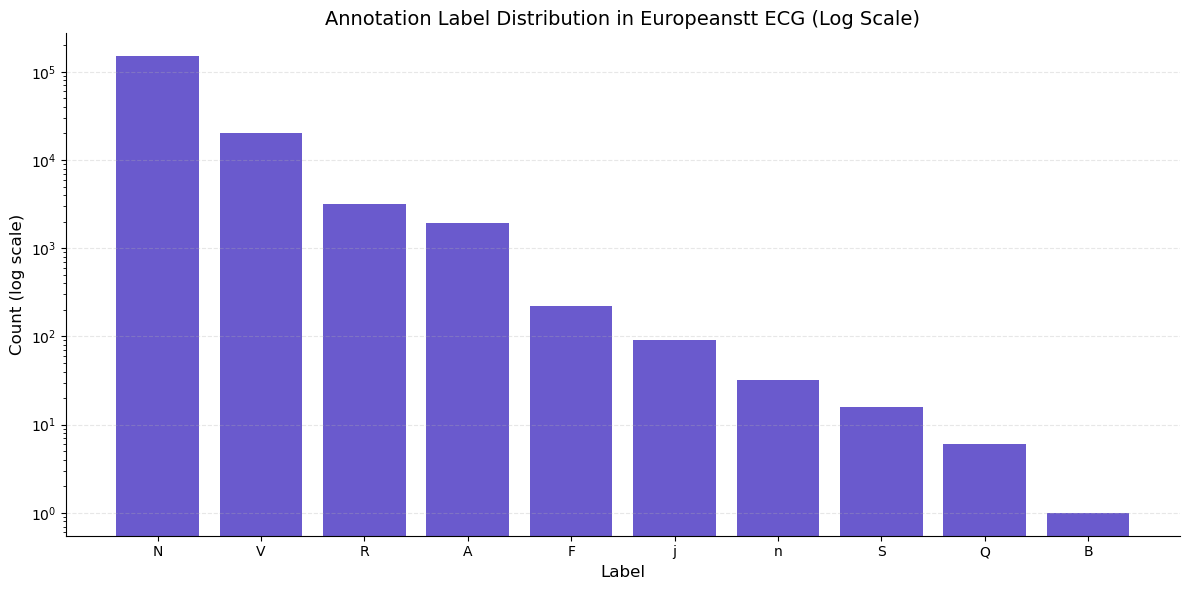

,Lead,Count
0,I,75
1,II,75
2,III,75
3,AVR,75
4,AVL,75
5,AVF,75
6,V1,75
7,V2,75
8,V3,75
9,V4,75


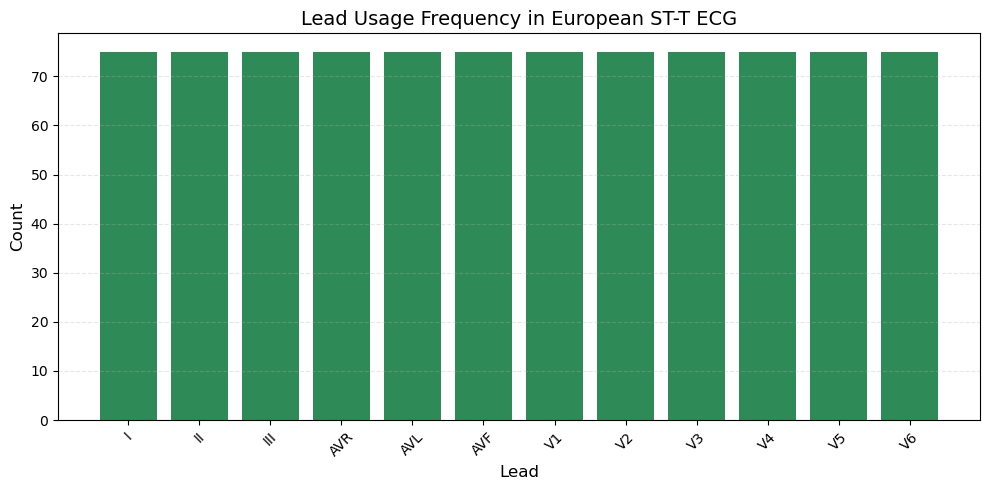

In [24]:
# 📦 필요한 라이브러리
import os
import wfdb
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 📁 데이터 디렉토리
data_dir = 'data/incart/'

# 📄 레코드 이름 수집
record_names = sorted({f.split('.')[0] for f in os.listdir(data_dir) if f.endswith('.dat')})

print(f"총 레코드 수: {len(record_names)}\n")

# 📊 전체 라벨 통계 저장용
total_label_counter = Counter()
total_lead_counter = Counter()
record_summaries = []

# 🔍 각 record에 대해 정보 출력
for record in record_names:
    try:
        # 헤더 파일 정보 읽기
        record_path = os.path.join(data_dir, record)
        record_info = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')

        # 기본 정보
        fs = record_info.fs
        sig_len = record_info.sig_len
        duration_sec = sig_len / fs
        n_channels = record_info.n_sig
        leads = record_info.sig_name

        # annotation 정보
        symbols = annotation.symbol
        aux_notes = annotation.aux_note if hasattr(annotation, 'aux_note') else []

        label_counts = Counter(symbols)
        total_label_counter.update(symbols)
        total_lead_counter.update(leads)  

        # 요약 저장
        record_summaries.append({
            'Record': record,
            'Sampling Frequency (Hz)': fs,
            'Signal Length (samples)': sig_len,
            'Duration (s)': round(duration_sec, 2),
						'Leads': ', '.join(record_info.sig_name),  
            'Channels': n_channels,
            'Annotation Count': len(symbols),
            'Unique Symbols': list(set(symbols))[:10],  # 앞 10개만 출력
            'Sample Aux Notes': list(set(aux_notes))[:5] if aux_notes else 'None'
        })

    except Exception as e:
        print(f"⚠️ {record} 처리 중 오류 발생: {e}")

# 🧾 레코드별 요약 정보 출력
summary_df = pd.DataFrame(record_summaries)
pd.set_option('display.max_colwidth', 100)
display(summary_df)

# ✅ 공식 PhysioBank beat labels
official_beat_labels = {
    'N', 'L', 'R', 'B', 'A', 'a', 'J', 'S', 'V', 'r',
    'F', 'e', 'j', 'n', 'E', '/', 'f', 'Q'
}

# 🎯 필터링된 전체 라벨 카운트
filtered_label_counter = {
    label: count for label, count in total_label_counter.items() if label in official_beat_labels
}

# 📊 전체 라벨 개수 정리
label_df = pd.DataFrame(filtered_label_counter.items(), columns=['Label', 'Count']).sort_values(by='Count', ascending=False)
display(label_df)

# 📈 시각화 - 상위 라벨
top_n = 10
df_top = label_df.head(top_n)

# 📈 전체 라벨 분포 논문 스타일로 시각화
plt.figure(figsize=(12, 6))
plt.bar(label_df['Label'], label_df['Count'], color='slateblue')

# y축 log scale
plt.yscale('log')

# 제목 & 축
plt.title('Annotation Label Distribution in Europeanstt ECG (Log Scale)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)

# 상단/우측 axis 제거
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 눈금 폰트 크기 조정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 눈금선 최소화
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.xaxis.grid(False)

# tight layout for clean spacing
plt.tight_layout()

plt.show()

# 📊 리드 통계 추가
lead_df = pd.DataFrame(total_lead_counter.items(), columns=['Lead', 'Count']).sort_values(by='Count', ascending=False)
display(lead_df)

# 📈 리드 분포 시각화
plt.figure(figsize=(10, 5))
plt.bar(lead_df['Lead'], lead_df['Count'], color='seagreen')
plt.title('Lead Usage Frequency in European ST-T ECG', fontsize=14)
plt.xlabel('Lead', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


▶️ Beat 추출 중...


100%|██████████| 75/75 [00:12<00:00,  5.86it/s]


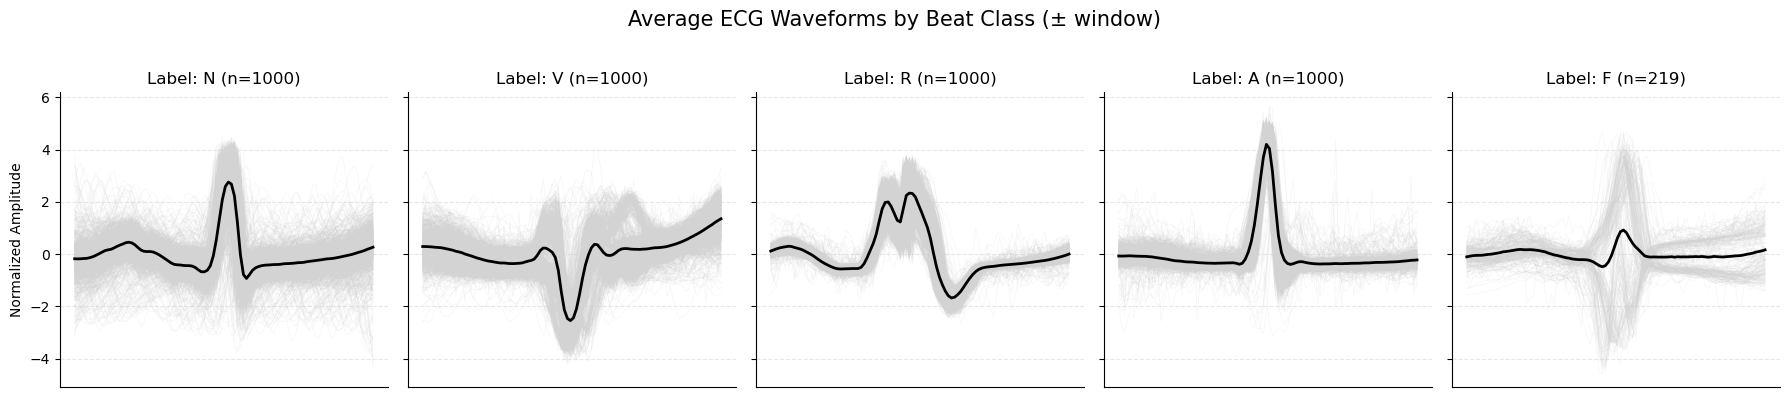

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os
from collections import defaultdict
from tqdm import tqdm

# ✅ 설정값
WINDOW_LEFT = 50
WINDOW_RIGHT = 50
TARGET_LABELS = ['N', 'V', 'R', 'A', 'F']
CHANNEL = 1
MAX_BEATS_PER_CLASS = 1000  # 너무 많을 경우 제한

# 📂 데이터 경로
data_dir = 'data/incart/'
record_names = sorted({f.split('.')[0] for f in os.listdir(data_dir) if f.endswith('.dat')})

# 🧠 클래스별 beat waveform 저장용
beats_by_label = defaultdict(list)

print("▶️ Beat 추출 중...")

for record in tqdm(record_names):
    try:
        # 신호 및 annotation 불러오기
        record_path = os.path.join(data_dir, record)
        record_data = wfdb.rdrecord(record_path)
        ann = wfdb.rdann(record_path, 'atr')

        signal = record_data.p_signal[:, CHANNEL]  # 선택 채널
        indices = ann.sample
        labels = ann.symbol

        for idx, label in zip(indices, labels):
            if label in TARGET_LABELS:
                start = idx - WINDOW_LEFT
                end = idx + WINDOW_RIGHT
                if start < 0 or end > len(signal):
                    continue
                beat = signal[start:end]
                beat = (beat - np.mean(beat)) / np.std(beat)  # ⚙️ 정규화
                beats_by_label[label].append(beat)

    except Exception as e:
        print(f"⚠️ {record} 에러: {e}")
        continue

# ✅ 시각화
fig, axs = plt.subplots(1, len(TARGET_LABELS), figsize=(18, 4), sharey=True)

for i, label in enumerate(TARGET_LABELS):
    ax = axs[i]
    beats = np.array(beats_by_label[label][:MAX_BEATS_PER_CLASS])  # 최대 개수 제한
    for b in beats:
        ax.plot(b, color='lightgray', alpha=0.2, linewidth=0.5)
    mean_beat = np.mean(beats, axis=0)
    ax.plot(mean_beat, color='black', linewidth=2, label='Mean')

    ax.set_title(f'Label: {label} (n={len(beats)})', fontsize=12)
    ax.set_xticks([])
    if i == 0:
        ax.set_ylabel('Normalized Amplitude')

    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle('Average ECG Waveforms by Beat Class (± window)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## MIT_BIH

총 레코드 수: 48



,Record,Sampling Frequency (Hz),Signal Length (samples),Duration (s),Leads,Channels,Annotation Count,Unique Symbols,Sample Aux Notes
0,100,360,650000,1805.56,"MLII, V5",2,2274,"[+, N, V, A]","[, (N ]"
1,101,360,650000,1805.56,"MLII, V1",2,1874,"[~, +, |, Q, N, A]","[, (N ]"
2,102,360,650000,1805.56,"V5, V2",2,2192,"[/, f, +, N, V]","[, (N , (P ]"
3,103,360,650000,1805.56,"MLII, V2",2,2091,"[~, +, N, A]","[, (N ]"
4,104,360,650000,1805.56,"V5, V2",2,2311,"[~, /, f, +, Q, N, V]","[, (N , (P ]"
5,105,360,650000,1805.56,"MLII, V1",2,2691,"[~, +, |, Q, N, V]","[, (N ]"
6,106,360,650000,1805.56,"MLII, V1",2,2098,"[~, +, N, V]","[, (VT , (N , (B , (T ]"
7,107,360,650000,1805.56,"MLII, V1",2,2140,"[~, +, /, V]","[, (P ]"
8,108,360,650000,1805.56,"MLII, V1",2,1824,"[~, x, A, j, +, |, N, V, F]","[, (N]"
9,109,360,650000,1805.56,"MLII, V1",2,2535,"[~, +, L, V, F]","[, (N ]"


,Label,Count
0,N,75052
8,L,8075
11,R,7259
2,V,7130
4,/,7028
1,A,2546
5,f,982
6,F,803
7,j,229
9,a,150


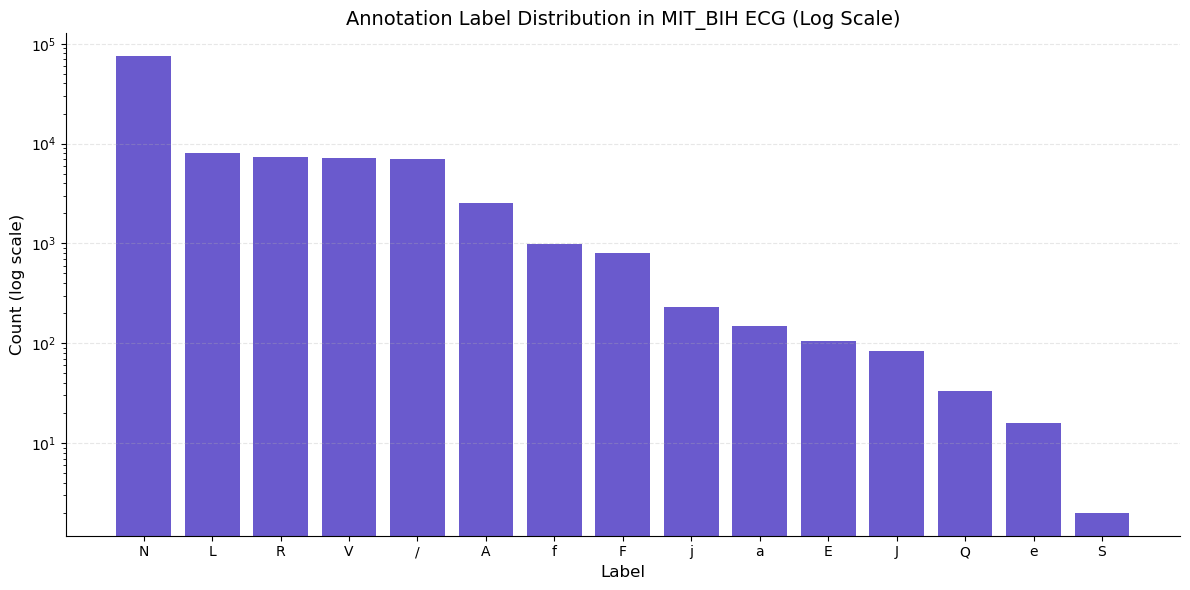

,Lead,Count
0,MLII,46
2,V1,40
1,V5,5
3,V2,4
4,V4,1


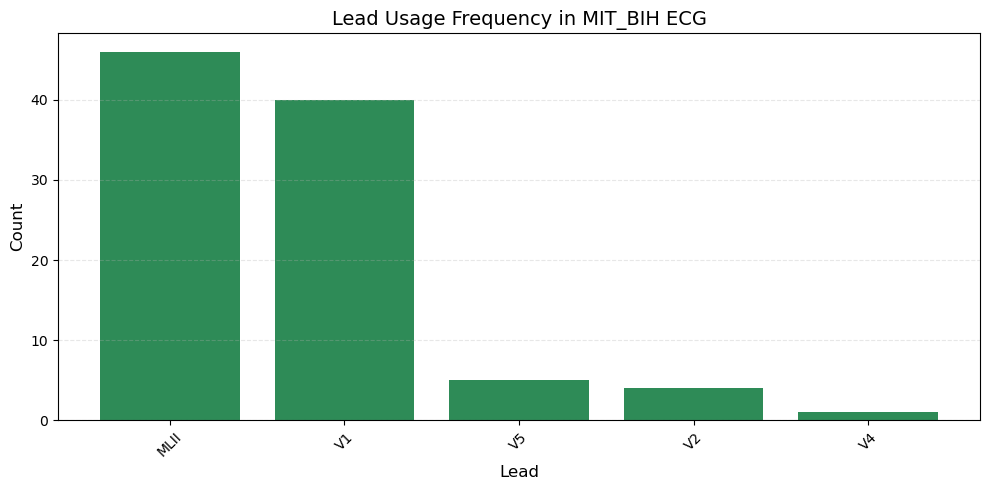

In [1]:
# 📦 필요한 라이브러리
import os
import wfdb
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 📁 데이터 디렉토리
data_dir = 'data/mit_bih/'

# 📄 레코드 이름 수집
record_names = sorted({f.split('.')[0] for f in os.listdir(data_dir) if f.endswith('.dat')})

print(f"총 레코드 수: {len(record_names)}\n")

# 📊 전체 라벨 통계 저장용
total_label_counter = Counter()
total_lead_counter = Counter()
record_summaries = []

# 🔍 각 record에 대해 정보 출력
for record in record_names:
    try:
        # 헤더 파일 정보 읽기
        record_path = os.path.join(data_dir, record)
        record_info = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')

        # 기본 정보
        fs = record_info.fs
        sig_len = record_info.sig_len
        duration_sec = sig_len / fs
        n_channels = record_info.n_sig
        leads = record_info.sig_name

        # annotation 정보
        symbols = annotation.symbol
        aux_notes = annotation.aux_note if hasattr(annotation, 'aux_note') else []

        label_counts = Counter(symbols)
        total_label_counter.update(symbols)
        total_lead_counter.update(leads)  

        # 요약 저장
        record_summaries.append({
            'Record': record,
            'Sampling Frequency (Hz)': fs,
            'Signal Length (samples)': sig_len,
            'Duration (s)': round(duration_sec, 2),
						'Leads': ', '.join(record_info.sig_name),  
            'Channels': n_channels,
            'Annotation Count': len(symbols),
            'Unique Symbols': list(set(symbols))[:10],  # 앞 10개만 출력
            'Sample Aux Notes': list(set(aux_notes))[:5] if aux_notes else 'None'
        })

    except Exception as e:
        print(f"⚠️ {record} 처리 중 오류 발생: {e}")

# 🧾 레코드별 요약 정보 출력
summary_df = pd.DataFrame(record_summaries)
pd.set_option('display.max_colwidth', 100)
display(summary_df)

# ✅ 공식 PhysioBank beat labels
official_beat_labels = {
    'N', 'L', 'R', 'B', 'A', 'a', 'J', 'S', 'V', 'r',
    'F', 'e', 'j', 'n', 'E', '/', 'f', 'Q'
}

# 🎯 필터링된 전체 라벨 카운트
filtered_label_counter = {
    label: count for label, count in total_label_counter.items() if label in official_beat_labels
}

# 📊 전체 라벨 개수 정리
label_df = pd.DataFrame(filtered_label_counter.items(), columns=['Label', 'Count']).sort_values(by='Count', ascending=False)
display(label_df)

# 📈 시각화 - 상위 라벨
top_n = 10
df_top = label_df.head(top_n)

# 📈 전체 라벨 분포 논문 스타일로 시각화
plt.figure(figsize=(12, 6))
plt.bar(label_df['Label'], label_df['Count'], color='slateblue')

# y축 log scale
plt.yscale('log')

# 제목 & 축
plt.title('Annotation Label Distribution in MIT_BIH ECG (Log Scale)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)

# 상단/우측 axis 제거
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 눈금 폰트 크기 조정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 눈금선 최소화
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.xaxis.grid(False)

# tight layout for clean spacing
plt.tight_layout()

plt.show()

# 📊 리드 통계 추가
lead_df = pd.DataFrame(total_lead_counter.items(), columns=['Lead', 'Count']).sort_values(by='Count', ascending=False)
display(lead_df)

# 📈 리드 분포 시각화
plt.figure(figsize=(10, 5))
plt.bar(lead_df['Lead'], lead_df['Count'], color='seagreen')
plt.title('Lead Usage Frequency in MIT_BIH ECG', fontsize=14)
plt.xlabel('Lead', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


▶️ Beat 추출 중...


100%|██████████| 48/48 [00:05<00:00,  8.55it/s]


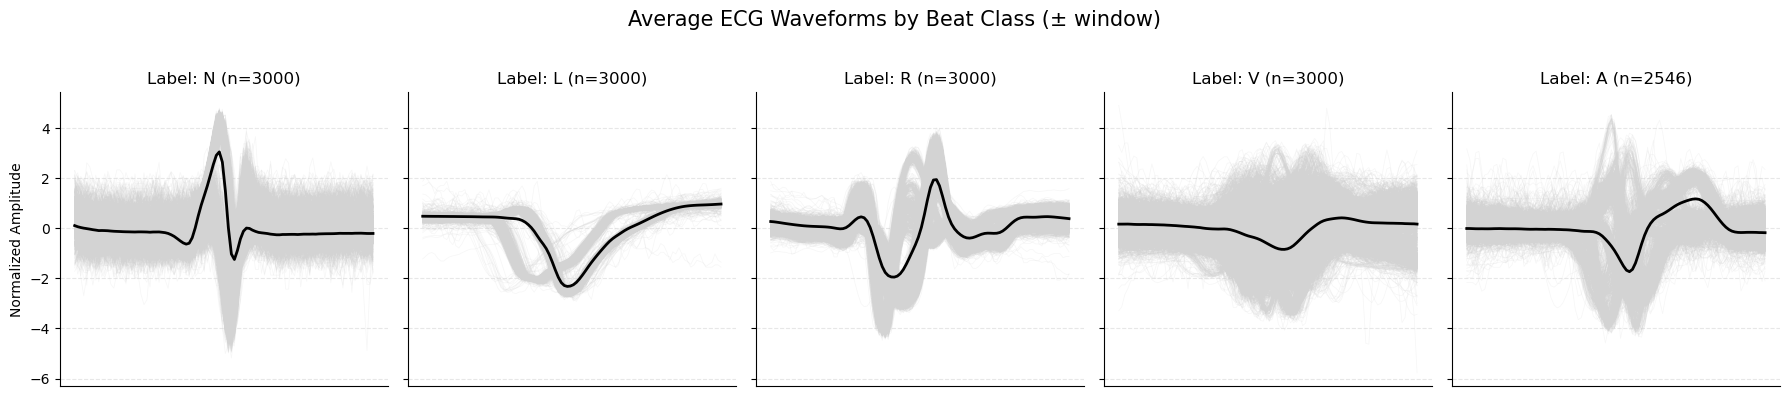

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os
from collections import defaultdict
from tqdm import tqdm

# ✅ 설정값
WINDOW_LEFT = 50
WINDOW_RIGHT = 50
TARGET_LABELS = ['N', 'L', 'R', 'V', 'A']
CHANNEL = 1
MAX_BEATS_PER_CLASS = 3000  # 너무 많을 경우 제한

# 📂 데이터 경로
data_dir = 'data/mit_bih/'
record_names = sorted({f.split('.')[0] for f in os.listdir(data_dir) if f.endswith('.dat')})

# 🧠 클래스별 beat waveform 저장용
beats_by_label = defaultdict(list)

print("▶️ Beat 추출 중...")

for record in tqdm(record_names):
    try:
        # 신호 및 annotation 불러오기
        record_path = os.path.join(data_dir, record)
        record_data = wfdb.rdrecord(record_path)
        ann = wfdb.rdann(record_path, 'atr')

        signal = record_data.p_signal[:, CHANNEL]  # 선택 채널
        indices = ann.sample
        labels = ann.symbol

        for idx, label in zip(indices, labels):
            if label in TARGET_LABELS:
                start = idx - WINDOW_LEFT
                end = idx + WINDOW_RIGHT
                if start < 0 or end > len(signal):
                    continue
                beat = signal[start:end]
                beat = (beat - np.mean(beat)) / np.std(beat)  # ⚙️ 정규화
                beats_by_label[label].append(beat)

    except Exception as e:
        print(f"⚠️ {record} 에러: {e}")
        continue

# ✅ 시각화
fig, axs = plt.subplots(1, len(TARGET_LABELS), figsize=(18, 4), sharey=True)

for i, label in enumerate(TARGET_LABELS):
    ax = axs[i]
    beats = np.array(beats_by_label[label][:MAX_BEATS_PER_CLASS])  # 최대 개수 제한
    for b in beats:
        ax.plot(b, color='lightgray', alpha=0.2, linewidth=0.5)
    mean_beat = np.mean(beats, axis=0)
    ax.plot(mean_beat, color='black', linewidth=2, label='Mean')

    ax.set_title(f'Label: {label} (n={len(beats)})', fontsize=12)
    ax.set_xticks([])
    if i == 0:
        ax.set_ylabel('Normalized Amplitude')

    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle('Average ECG Waveforms by Beat Class (± window)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## European ST_T

총 레코드 수: 90



,Record,Sampling Frequency (Hz),Signal Length (samples),Duration (s),Leads,Channels,Annotation Count,Unique Symbols,Sample Aux Notes
0,e0103,250,1800000,7200.0,"V4, MLIII",2,7336,"[F, N, V, s, +, ~]","[, AST1+100, (VT, ST1+) , AST1+150]"
1,e0104,250,1800000,7200.0,"MLIII, V4",2,7824,"[S, N, V, s, T, |, +, ~]","[, AT1-400 , AT0-200, AT1+200, (T1+ ]"
2,e0105,250,1800000,7200.0,"MLIII, V4",2,6704,"[S, N, s, T, +, ~]","[, T0+), AST0+400, ST1-) , AST0+700]"
3,e0106,250,1800000,7200.0,"MLIII, V3",2,7217,"[S, N, s, T, +, ~]","[, AT0-200, AST1-200, AT1+200, ST1-) ]"
4,e0107,250,1800000,7200.0,"D3, V4",2,7240,"[S, N, V, s, T, +, Q, ~]","[, AT1+450, (T0+  , ST1-) , AST1-100]"
...,...,...,...,...,...,...,...,...,...
85,e0817,250,1800000,7200.0,"V5, V1",2,7878,"[N, s, T, +, ~]","[, AST1-100, AT1+200, (ST1- , (T1+ ]"
86,e0818,250,1800000,7200.0,"V5, V1",2,10354,"[N, s, T, +, ~]","[, AST0-150, AT0-200, (T0-  , T0-)  ]"
87,e1301,250,1800000,7200.0,"V1, V5",2,8791,"[S, N, V, s, T, +, ~]","[, (T0- N, AT0-200, AST1-200, (T0-  ]"
88,e1302,250,1800000,7200.0,"V1, V5",2,8461,"[S, N, V, s, T, +, ~]","[, AT0+200, AST1-100, AT1-200, AT0+300]"


,Label,Count
0,N,784633
1,V,4467
3,S,1093
2,F,354
4,Q,11
6,n,5
5,J,1
7,a,1


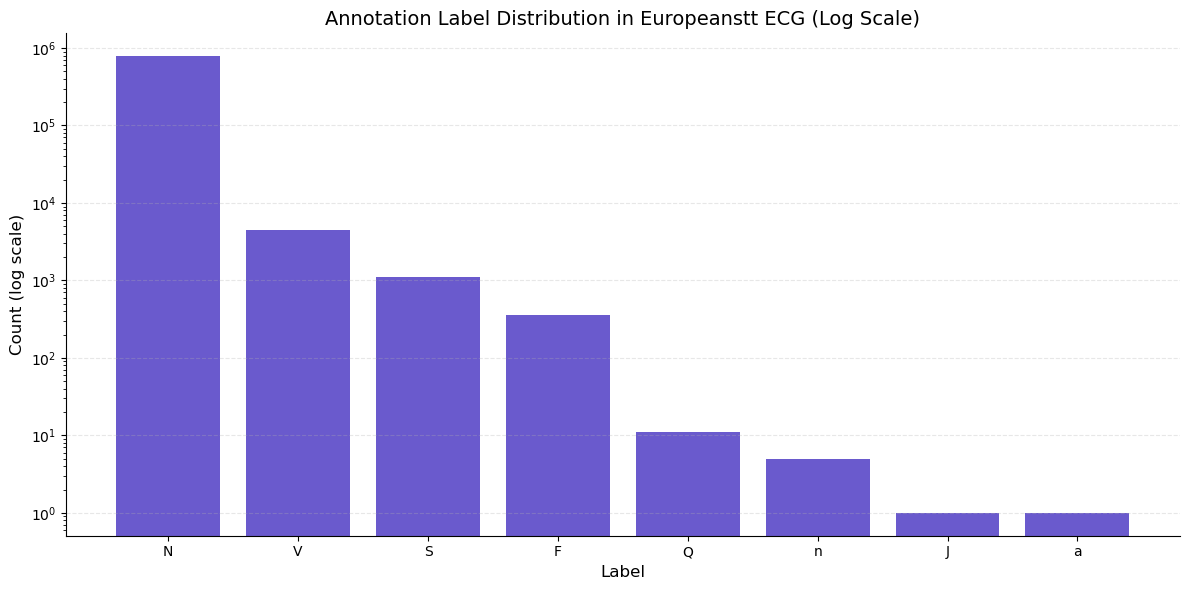

,Lead,Count
4,V5,51
1,MLIII,47
0,V4,34
5,MLI,19
7,V1,11
6,V2,10
2,V3,7
3,D3,1


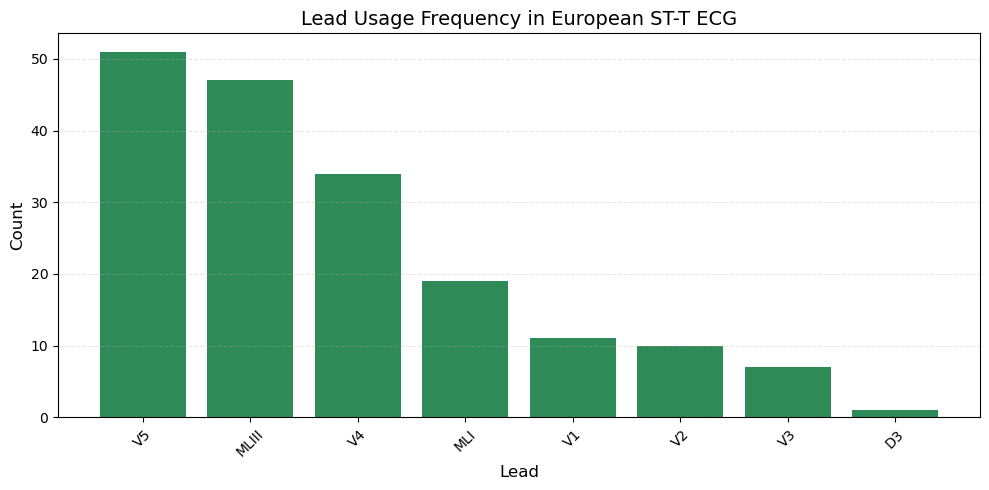

In [22]:
# 📦 필요한 라이브러리
import os
import wfdb
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 📁 데이터 디렉토리
data_dir = 'data/europeanstt/'

# 📄 레코드 이름 수집
record_names = sorted({f.split('.')[0] for f in os.listdir(data_dir) if f.endswith('.dat')})

print(f"총 레코드 수: {len(record_names)}\n")

# 📊 전체 라벨 통계 저장용
total_label_counter = Counter()
total_lead_counter = Counter()
record_summaries = []

# 🔍 각 record에 대해 정보 출력
for record in record_names:
    try:
        # 헤더 파일 정보 읽기
        record_path = os.path.join(data_dir, record)
        record_info = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')

        # 기본 정보
        fs = record_info.fs
        sig_len = record_info.sig_len
        duration_sec = sig_len / fs
        n_channels = record_info.n_sig
        leads = record_info.sig_name

        # annotation 정보
        symbols = annotation.symbol
        aux_notes = annotation.aux_note if hasattr(annotation, 'aux_note') else []

        label_counts = Counter(symbols)
        total_label_counter.update(symbols)
        total_lead_counter.update(leads)  

        # 요약 저장
        record_summaries.append({
            'Record': record,
            'Sampling Frequency (Hz)': fs,
            'Signal Length (samples)': sig_len,
            'Duration (s)': round(duration_sec, 2),
						'Leads': ', '.join(record_info.sig_name),  
            'Channels': n_channels,
            'Annotation Count': len(symbols),
            'Unique Symbols': list(set(symbols))[:10],  # 앞 10개만 출력
            'Sample Aux Notes': list(set(aux_notes))[:5] if aux_notes else 'None'
        })

    except Exception as e:
        print(f"⚠️ {record} 처리 중 오류 발생: {e}")

# 🧾 레코드별 요약 정보 출력
summary_df = pd.DataFrame(record_summaries)
pd.set_option('display.max_colwidth', 100)
display(summary_df)

# ✅ 공식 PhysioBank beat labels
official_beat_labels = {
    'N', 'L', 'R', 'B', 'A', 'a', 'J', 'S', 'V', 'r',
    'F', 'e', 'j', 'n', 'E', '/', 'f', 'Q'
}

# 🎯 필터링된 전체 라벨 카운트
filtered_label_counter = {
    label: count for label, count in total_label_counter.items() if label in official_beat_labels
}

# 📊 전체 라벨 개수 정리
label_df = pd.DataFrame(filtered_label_counter.items(), columns=['Label', 'Count']).sort_values(by='Count', ascending=False)
display(label_df)

# 📈 시각화 - 상위 라벨
top_n = 10
df_top = label_df.head(top_n)

# 📈 전체 라벨 분포 논문 스타일로 시각화
plt.figure(figsize=(12, 6))
plt.bar(label_df['Label'], label_df['Count'], color='slateblue')

# y축 log scale
plt.yscale('log')

# 제목 & 축
plt.title('Annotation Label Distribution in Europeanstt ECG (Log Scale)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)

# 상단/우측 axis 제거
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 눈금 폰트 크기 조정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 눈금선 최소화
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.xaxis.grid(False)

# tight layout for clean spacing
plt.tight_layout()

plt.show()

# 📊 리드 통계 추가
lead_df = pd.DataFrame(total_lead_counter.items(), columns=['Lead', 'Count']).sort_values(by='Count', ascending=False)
display(lead_df)

# 📈 리드 분포 시각화
plt.figure(figsize=(10, 5))
plt.bar(lead_df['Lead'], lead_df['Count'], color='seagreen')
plt.title('Lead Usage Frequency in European ST-T ECG', fontsize=14)
plt.xlabel('Lead', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


▶️ Beat 추출 중...


100%|██████████| 90/90 [01:13<00:00,  1.22it/s]


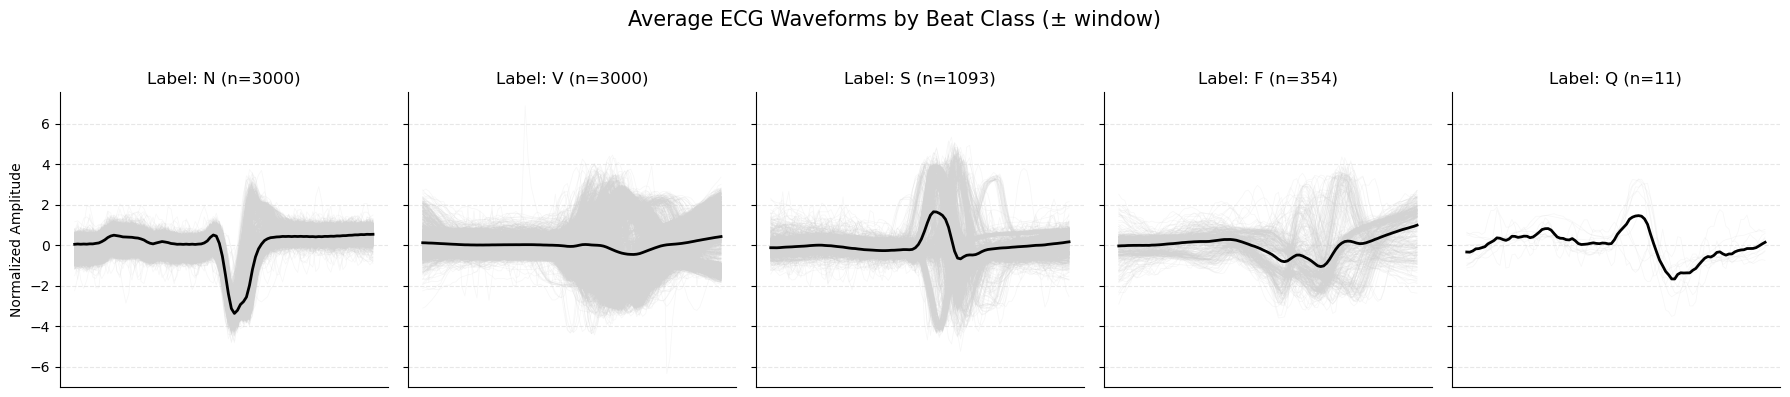

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os
from collections import defaultdict
from tqdm import tqdm

# ✅ 설정값
WINDOW_LEFT = 50
WINDOW_RIGHT = 50
TARGET_LABELS = ['N', 'V', 'S', 'F', 'Q']
CHANNEL = 1
MAX_BEATS_PER_CLASS = 3000  # 너무 많을 경우 제한

# 📂 데이터 경로
data_dir = 'data/europeanstt/'
record_names = sorted({f.split('.')[0] for f in os.listdir(data_dir) if f.endswith('.dat')})

# 🧠 클래스별 beat waveform 저장용
beats_by_label = defaultdict(list)

print("▶️ Beat 추출 중...")

for record in tqdm(record_names):
    try:
        # 신호 및 annotation 불러오기
        record_path = os.path.join(data_dir, record)
        record_data = wfdb.rdrecord(record_path)
        ann = wfdb.rdann(record_path, 'atr')

        signal = record_data.p_signal[:, CHANNEL]  # 선택 채널
        indices = ann.sample
        labels = ann.symbol

        for idx, label in zip(indices, labels):
            if label in TARGET_LABELS:
                start = idx - WINDOW_LEFT
                end = idx + WINDOW_RIGHT
                if start < 0 or end > len(signal):
                    continue
                beat = signal[start:end]
                beat = (beat - np.mean(beat)) / np.std(beat)  # ⚙️ 정규화
                beats_by_label[label].append(beat)

    except Exception as e:
        print(f"⚠️ {record} 에러: {e}")
        continue

# ✅ 시각화
fig, axs = plt.subplots(1, len(TARGET_LABELS), figsize=(18, 4), sharey=True)

for i, label in enumerate(TARGET_LABELS):
    ax = axs[i]
    beats = np.array(beats_by_label[label][:MAX_BEATS_PER_CLASS])  # 최대 개수 제한
    for b in beats:
        ax.plot(b, color='lightgray', alpha=0.2, linewidth=0.5)
    mean_beat = np.mean(beats, axis=0)
    ax.plot(mean_beat, color='black', linewidth=2, label='Mean')

    ax.set_title(f'Label: {label} (n={len(beats)})', fontsize=12)
    ax.set_xticks([])
    if i == 0:
        ax.set_ylabel('Normalized Amplitude')

    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle('Average ECG Waveforms by Beat Class (± window)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


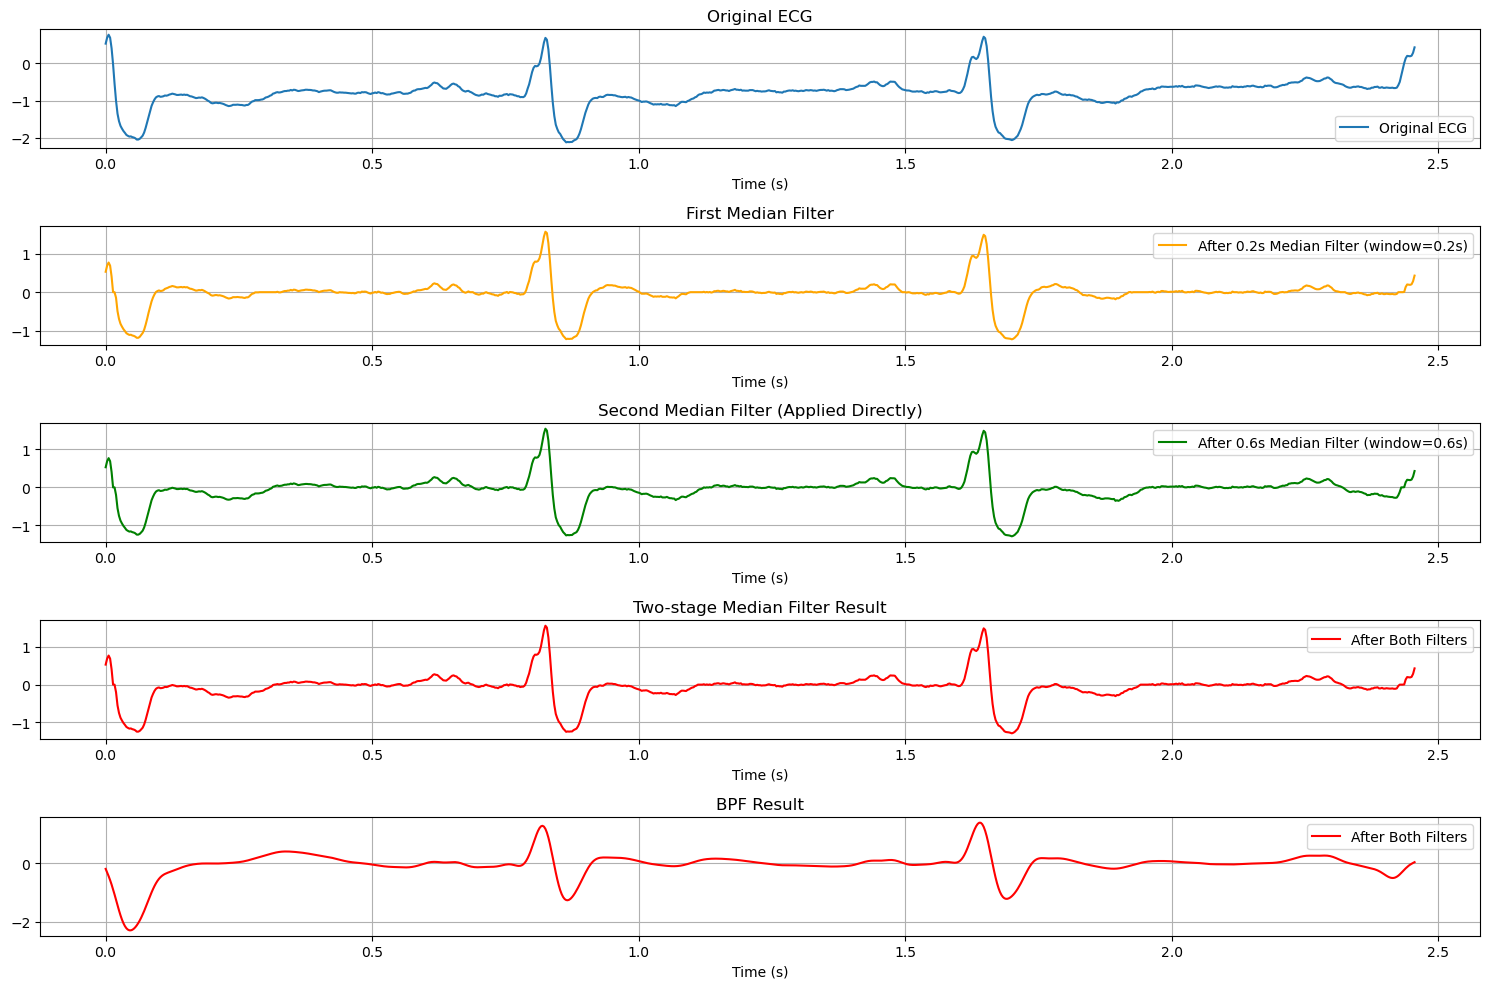

In [14]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from ecg_pipeline import bandpass_filter

record_name = '118'
sampling_rate = 360

record = wfdb.rdrecord(f'data/mit_bih/{record_name}')
annotation = wfdb.rdann(f'data/mit_bih/{record_name}', 'atr')

signal = record.p_signal[:, 0]  # 첫 번째 채널 선택
r_peaks = annotation.sample

# 100 ~ 102
idx = 200 
start = r_peaks[idx - 1]
end = r_peaks[idx + 2]

signal = signal[start:end]

med1 = medfilt(signal, int(0.2 * sampling_rate)-1)
med2 = medfilt(signal, int(0.6 * sampling_rate)-1)
baseline = medfilt(med1, int(0.6 * sampling_rate)-1)

time = np.arange(len(signal)) / sampling_rate

filtering_signal = bandpass_filter(signal, 360, lowcut=1.5, highcut=20, order=4)

plt.figure(figsize=(15, 10))
plt.subplot(5, 1, 1)
plt.plot(time, signal, label="Original ECG")
plt.xlabel("Time (s)")
plt.title("Original ECG")
plt.grid()
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(time, signal - med1, label=f"After 0.2s Median Filter (window=0.2s)", color='orange')
plt.title("First Median Filter")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(time, signal - med2, label=f"After 0.6s Median Filter (window=0.6s)", color='green')
plt.title("Second Median Filter (Applied Directly)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(time, signal - baseline, label="After Both Filters", color='red')
plt.title("Two-stage Median Filter Result")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(time, filtering_signal, label="After Both Filters", color='red')
plt.title("BPF Result")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()